# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('test_LR.csv')
print(data.head())
print(data.shape)
data['y'].head()

    x          y
0  77  79.775152
1  21  23.177279
2  22  25.609262
3  20  17.857388
4  36  41.849864
(300, 2)


0    79.775152
1    23.177279
2    25.609262
3    17.857388
4    41.849864
Name: y, dtype: float64

## Explore and plot the data

In [3]:
mean = data.mean()
print(mean)
describe = data.describe()
describe

x    50.936667
y    51.205051
dtype: float64


,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


[Text(0.5, 1.0, 'X-Y plot')]

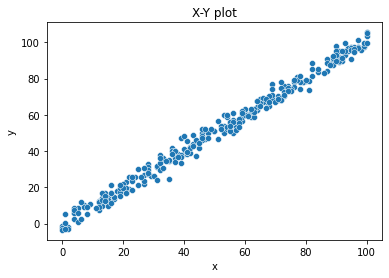

In [4]:
sns.scatterplot(x=data['x'] , y=data['y']).set(title="X-Y plot")

In [5]:
X = data['x']
Y = data['y']

In [6]:
print(X)
print(X.shape)
print(X.ndim)

0      77
1      21
2      22
3      20
4      36
       ..
295    71
296    46
297    55
298    62
299    47
Name: x, Length: 300, dtype: int64
(300,)
1


In [7]:
X = np.stack((np.ones(300),X ), axis=1)
X

array([[  1.,  77.],
       [  1.,  21.],
       [  1.,  22.],
       [  1.,  20.],
       [  1.,  36.],
       [  1.,  15.],
       [  1.,  62.],
       [  1.,  95.],
       [  1.,  20.],
       [  1.,   5.],
       [  1.,   4.],
       [  1.,  19.],
       [  1.,  96.],
       [  1.,  62.],
       [  1.,  36.],
       [  1.,  15.],
       [  1.,  65.],
       [  1.,  14.],
       [  1.,  87.],
       [  1.,  69.],
       [  1.,  89.],
       [  1.,  51.],
       [  1.,  89.],
       [  1.,  27.],
       [  1.,  97.],
       [  1.,  58.],
       [  1.,  79.],
       [  1.,  21.],
       [  1.,  93.],
       [  1.,  27.],
       [  1.,  99.],
       [  1.,  31.],
       [  1.,  33.],
       [  1.,  80.],
       [  1.,  28.],
       [  1.,  47.],
       [  1.,  53.],
       [  1.,  69.],
       [  1.,  28.],
       [  1.,  33.],
       [  1.,  91.],
       [  1.,  71.],
       [  1.,  50.],
       [  1.,  76.],
       [  1.,   4.],
       [  1.,  37.],
       [  1.,  70.],
       [  1.,

In [8]:
print(X.shape)
print(X.ndim)

(300, 2)
2


In [9]:
def predict(X ,  theta):
    y_hat = np.dot(X , theta)
    return y_hat

In [10]:
pred = predict(X , theta=np.zeros(2))
pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [11]:
m = len(Y)
m

300

In [12]:
def predict_cost(X , Y , theta):
    m = len(Y)
    SE = (predict(X,theta) - Y)**2 #square error
    SSE = np.sum(SE) # sum of squared error
    MSE = SSE/(2*m) # mean squared error
    
    return MSE

In [13]:
cost = predict_cost(X,Y , np.zeros(2))
cost

1732.1455435695395

## Model Building using gradient descent

In [14]:
def Gradient_Descent(X , Y , theta, alpha , iteration):
    m = len(Y)
    cose_history = []
    theta = theta.copy()
    # cost minimization
    for i in range(iteration):
        diff = predict(X , theta) - Y
        theta = theta - alpha*(np.dot(diff , X))/m
        cose_history.append(predict_cost(X , Y , theta))
    
    return theta , cose_history


In [15]:
# train our model
theta = np.zeros(2)
alpha = 0.00001
iteration = 500
theta_ , cost_history = Gradient_Descent(X , Y , theta , alpha , iteration)
print(theta_)

[0.01450438 1.00720805]


## Plot of cost function v/s iterration

Text(0.5, 1.0, 'Values of Cost Function over iterations of Gradient Descent')

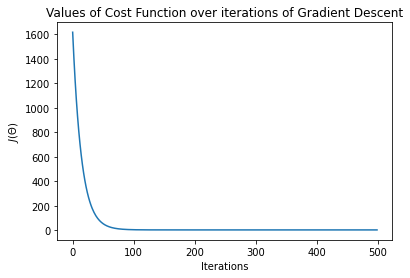

In [16]:
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent")
#plt.show()

## Plot of regression line

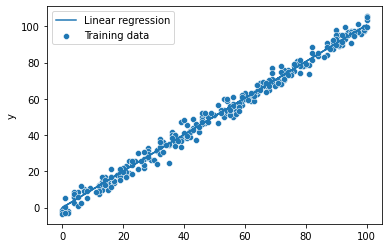

In [17]:
sns.scatterplot(x=X[: , 1] , y=Y)
plt.plot(
    X[:, 1], np.dot(X, theta_), "-"
)  
plt.legend(["Linear regression","Training data"])
